In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LogisticGrowthModel import *

In [2]:
N_Gens   = 10000
N_Pops   = 1000 # Number of coupled logistic growth maps
epsilons = [0, 0.075, 0.1, 0.2, 0.225, 0.25, 0.3, 0.4]
r = np.random.uniform(low=3.9,high=4.0, size=(N_Pops,))
K = np.ones(shape=(N_Pops,))*100
growthModels = generateGrowthModels(r,K)
X = np.zeros(shape=(N_Pops,N_Gens,len(epsilons)))
X[:,0,:]=1.0

In [3]:
for epsInx, eps in enumerate(epsilons):
    print('Evaluating for epsilon: ', eps)
    for n in range(N_Gens-1):
        X[:,n+1,epsInx]= globalLogisticGrowth(X[:,n,epsInx],growthModels,eps)

Evaluating for epsilon:  0
Evaluating for epsilon:  0.075
Evaluating for epsilon:  0.1
Evaluating for epsilon:  0.2
Evaluating for epsilon:  0.225
Evaluating for epsilon:  0.25
Evaluating for epsilon:  0.3
Evaluating for epsilon:  0.4


In [4]:
imfs = []
for epsInx, eps in enumerate(epsilons):
    imfs.append([instMeanFeild(x) for x in X[:,:,epsInx].T])
imfs = np.array(imfs)
imfs.shape

(8, 10000)

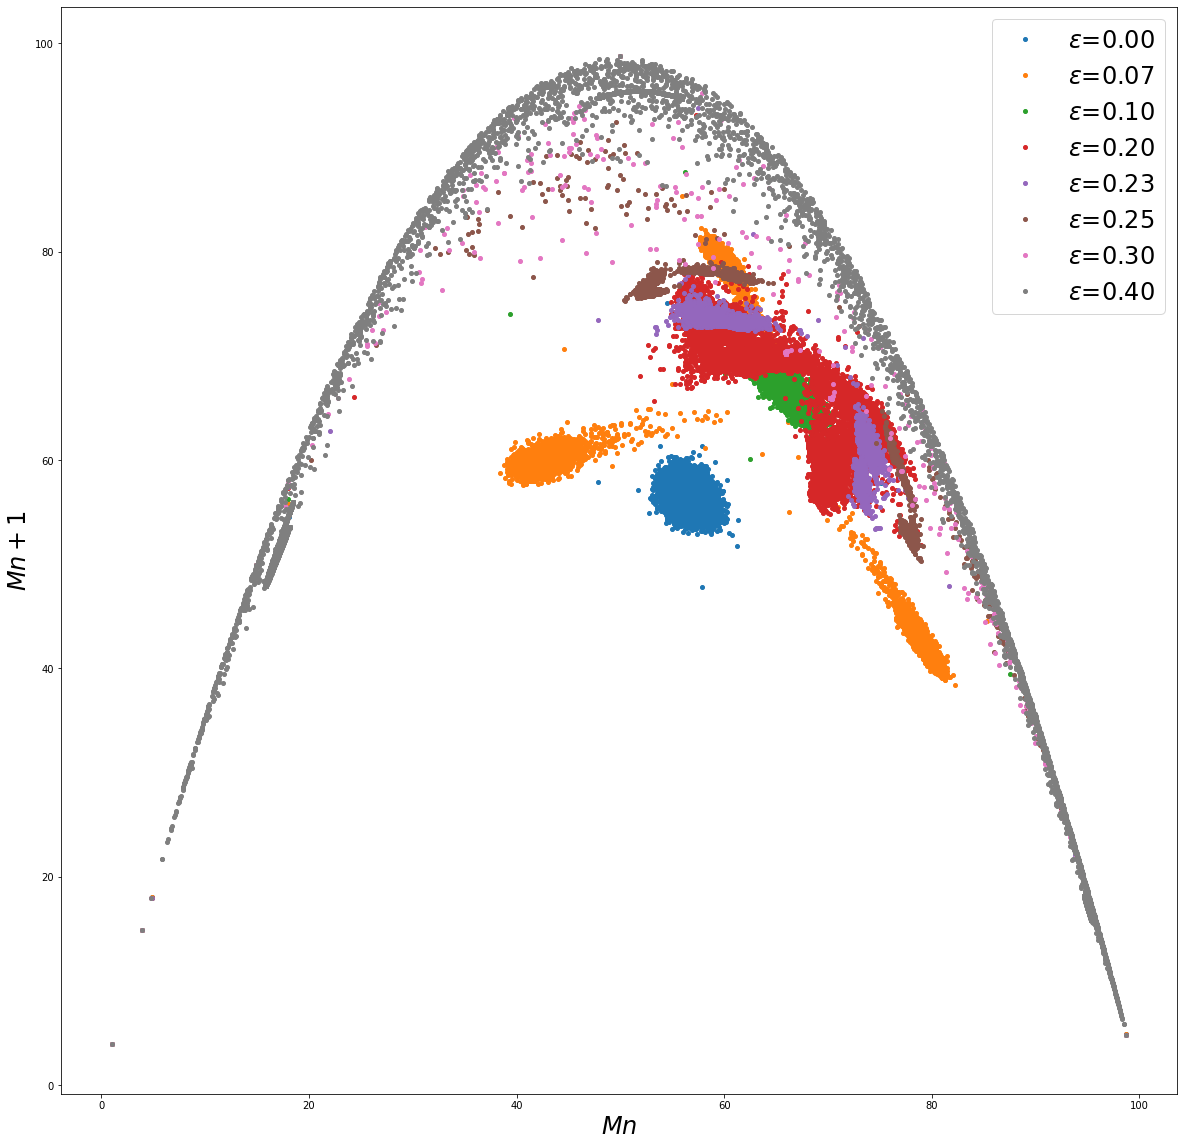

In [5]:
plt.figure(figsize=(20,20))
for eps, imf in zip(epsilons,imfs):
    plt.plot(imf[:-1],imf[1:],'o', markersize=4, label='$\epsilon$={:4.2f}'.format(eps))
#plt.xlim(40,90)
#plt.ylim(40,90)
plt.legend(fontsize=24)
plt.xlabel('$Mn$', fontsize=24);
plt.ylabel('$Mn+1$',fontsize=24);